In [1]:
disp('PASSENGER CARS SOLD') % SEASONALLY ADJUSTED DATASET!
pkg load io
pkg load signal
pkg load control
cars=csvread( % MIRAR TRUCKS EN VEZ DE COCHES 
"C:/Users/dishi/OneDrive/Desktop/TFG/MY_DATA/carsdata.csv");
cars=cars(122:573,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(cars) % dimension to later construct time vector!!

disp('NEW PRIVATE HOUSING UNITS STARTED') 
house=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/MY_DATA/housedata.csv");
house=house(134:585,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(house)

disp('ALL EMPLOYEES, CONSTRUCTION')
conworker=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/MY_DATA/conworker.csv");
conworker=conworker(374:825,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(conworker)

disp('MANUFACTURERS NEW ORDERS')
manorder=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/MY_DATA/manorder.csv");
manorder=manorder(2:188,3); % column 3 = monthly data, sampled from 1 Feb 1992 to 31 August (8) 2007, no data for 1970s
size(manorder)

PASSENGER CARS SOLD
ans =

   452     1

NEW PRIVATE HOUSING UNITS STARTED
ans =

   452     1

ALL EMPLOYEES, CONSTRUCTION
ans =

   452     1

MANUFACTURERS NEW ORDERS
ans =

   187     1



In [2]:
disp('TOOLBOX CONFIGURATION')
e4init % loading the E4 toolbox 
pkg load control
addpath('C:\Program Files\PracticasLDHR-main\OctMat')
savepath
addpath('C:\Program Files\PracticasLDHR-main\spcline')
savepath
addpath('C:/Program Files/E4withSubspaces')
savepath
addpath('C:\Program Files\E4Matlab')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath

TOOLBOX CONFIGURATION

                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
    sete4opt at line 36 column 44
    e4init at line 48 column 1

 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. n

In [3]:
disp('LDHR code1')
PaP=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaP=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 
% using 'house' as the data for new houses built 
[VAR,P,TVP,oar]=autodhr(house,12,[],[],PaP,TVPaP,1) % THINK OF HOW TO GET RID OF WARNING MESSAGE
% IMPORTANT TO PUT 1 AT THE END OF THE AUTODHR FUNCTION!

LDHR code1
PaP =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaP =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    arma2thd at line 81 column 35
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4st

In [4]:
disp('LDHR code2')
NVR=VAR(2:8)./VAR(1) % calculation of variance ratios 
filt=0;
[trendhouse,seasonhouse,cyclehouse,irreghouse]=dhrfilt(house,P,TVP,VAR,12,filt,0);
% the 4 components of time series 

LDHR code2
NVR =

 Columns 1 through 6:

   1.3417e-02   3.7672e-02   9.2772e-04   1.3020e-02   2.1439e-02   8.4502e-03

 Column 7:

   2.2686e-03

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    arma2thd at line 81 column 35
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 43 column 15
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 43 column 15
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at lin

HOUSING STARTS, TREND


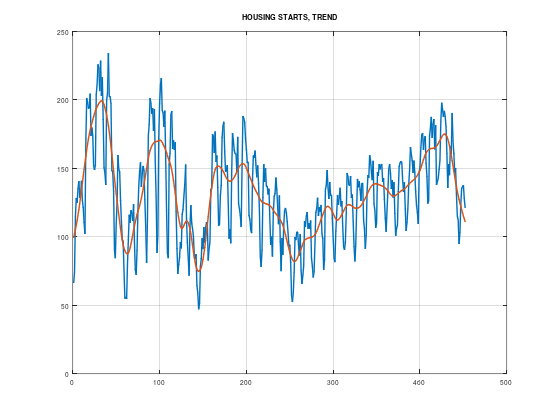

In [5]:
disp('HOUSING STARTS, TREND')
trendhouse=trendhouse(:,1); % the first column of trend is the trend vector, redifine trendhouse
plot([house,trendhouse],'linewidth',1.4)
grid on
title('HOUSING STARTS, TREND')

DIFFERENCED TREND WITH LDHR


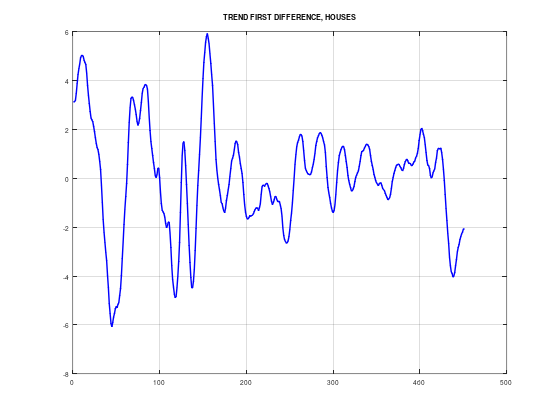

In [6]:
disp('DIFFERENCED TREND WITH LDHR')
dtrendhouse=diff(trendhouse);
plot(dtrendhouse,'b','linewidth',1.4)
grid on
title('TREND FIRST DIFFERENCE, HOUSES')

In [36]:
disp('CREATING TIME VECTOR')
pkg load cfitsio 
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath
time=timefmt4(12,1970,1,452); % last input = number of rows of vectors of cars, houses and conworkers, can index with (obs,:)
time=time(3:end,:);

CREATING TIME VECTOR


In [33]:
disp('CONFIRMATION OF A RECESSION')
window = 3; % window size for consecutive negative values
confirmedrec = []; % array to store the indices of confirmation of a recession
% Loop through the elements of sm_dtrend
for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) < 0) && dtrendhouse(i-1) > 0 
        confirmedrec=[confirmedrec, i + window - 1]; % if the condition is met, store the index of the 6th negative element
    end
end
disp('Indices of the nth negative element of sm_dtrend preceded by a positive value:');
confirmedrec=confirmedrec' % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
recessiontime=time(confirmedrec,:); % DATES OF CONFIRMED RECESSION
houserecession=dtrendhouse(confirmedrec,:) % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the nth negative element of sm_dtrend preceded by a positive value:
confirmedrec =

    35
   103
   133
   170
   198
   296
   320
   351
   430

houserecession =

  -1.6973
  -1.3100
  -1.9026
  -0.7126
  -1.0950
  -0.8002
  -0.3912
  -0.2395
  -1.2295



In [38]:
disp('CONFIRMATION OF EXPANSION')
window = 3;  % window size for consecutive values
confirmedexp = [];  % array to store the indices of confirmation of a recession or expansion
% Loop through the elements of dtrendhouse
for i = 2:(length(dtrendhouse) - window + 1)
    if all(dtrendhouse(i:i+window-1) > 0) && dtrendhouse(i-1) < 0
        confirmedexp = [confirmedexp, i + window - 1];
    end
end

disp('Indices of the nth positive element of dtrendhouse preceded by a negative value:');
confirmedexp = confirmedexp'  % Convert to a column vector
size(dtrendhouse); % Checking the size of dtrendhouse vector
size(time);  % Checking the size of the time vector
expansiontime=time(confirmedexp,:);
houseexpansion=dtrendhouse(confirmedexp,:)

CONFIRMATION OF EXPANSION
Indices of the nth positive element of dtrendhouse preceded by a negative value:
confirmedexp =

    65
   128
   147
   183
   257
   307
   328
   371

houseexpansion =

   2.2863
   1.4912
   1.6497
   0.7083
   0.9571
   0.9210
   0.2165
   0.3128



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


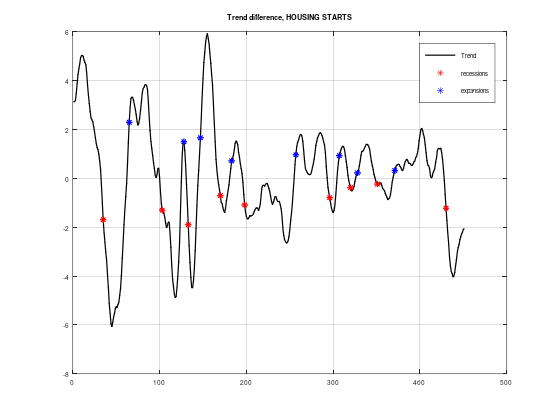

In [39]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
plot(dtrendhouse,'k','linewidth',1.2)
hold on
plot(confirmedrec,houserecession,'r*','linewidth',1.3) % red are recessions
plot(confirmedexp,houseexpansion,'b*','linewidth',1.3) % green are expansions
hold off
grid on
title('Trend difference, HOUSING STARTS')
legend('Trend','recessions','expansions')

In [41]:
disp('DATES OF EXPANSIONS AND RECESSION ACCORDING TO DATASET')
expansiontime
recessiontime

DATES OF EXPANSIONS AND RECESSION ACCORDING TO DATASET
expansiontime =

1975-06-01  
1980-09-01  
1982-04-01  
1985-04-01  
1991-06-01  
1995-08-01  
1997-05-01  
2000-12-01  

recessiontime =

1972-12-01  
1978-08-01  
1981-02-01  
1984-03-01  
1986-07-01  
1994-09-01  
1996-09-01  
1999-04-01  
2005-11-01  

